# Pymaceuticals Inc.
---

### Analysis

- The dataset provides information on pharmaceutical trials for drugs to reduce tumor size in cancer treatments. The data indicates a few notable trends. Of the drug regimens considered, Ramicane and Capomulin demonstrated the most consistent efficacy, with significantly less variability than Infubinol or Ceftamin. 
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import seaborn as sns
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
df_raw = pd.merge(study_results, mouse_metadata, on="Mouse ID", how = "left")

# Display the data table for preview
print(df_raw.shape)
df_raw.info()

(1893, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Timepoint           1893 non-null   int64  
 2   Tumor Volume (mm3)  1893 non-null   float64
 3   Metastatic Sites    1893 non-null   int64  
 4   Drug Regimen        1893 non-null   object 
 5   Sex                 1893 non-null   object 
 6   Age_months          1893 non-null   int64  
 7   Weight (g)          1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 118.4+ KB


In [2]:
df_raw.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice.
df_raw["Mouse ID"].nunique()

249

In [4]:
df_raw.groupby(["Mouse ID", "Timepoint"]).size().sort_values(ascending=False).head(10)

Mouse ID  Timepoint
g989      20           2
          15           2
          10           2
          5            2
          0            2
a203      0            1
q633      0            1
q610      20           1
          25           1
          30           1
dtype: int64

In [5]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

# Previous cell shoes that g989 is the duplicate
mask = df_raw["Mouse ID"] != "g989"
df_clean = df_raw.loc[mask].reset_index(drop=True)

df_clean.info()
print(df_clean.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1880 entries, 0 to 1879
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1880 non-null   object 
 1   Timepoint           1880 non-null   int64  
 2   Tumor Volume (mm3)  1880 non-null   float64
 3   Metastatic Sites    1880 non-null   int64  
 4   Drug Regimen        1880 non-null   object 
 5   Sex                 1880 non-null   object 
 6   Age_months          1880 non-null   int64  
 7   Weight (g)          1880 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 117.6+ KB
(1880, 8)


In [6]:
# Checking the number of mice in the clean DataFrame
df_clean["Mouse ID"].nunique()

248

## Summary Statistics

In [7]:
df_clean["Tumor Volume (mm3)"].describe()

count    1880.000000
mean       50.435293
std         8.914197
min        22.050126
25%        45.000000
50%        48.933454
75%        56.324075
max        78.567014
Name: Tumor Volume (mm3), dtype: float64

In [8]:
df_clean["Drug Regimen"].unique()

array(['Capomulin', 'Ketapril', 'Naftisol', 'Infubinol', 'Stelasyn',
       'Ramicane', 'Zoniferol', 'Propriva', 'Placebo', 'Ceftamin'],
      dtype=object)

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
df_grouped = df_clean.groupby(by = ["Drug Regimen"])
summ1 = df_grouped["Tumor Volume (mm3)"].describe()
# Assemble the resulting series into a single summary DataFrame.


In [10]:
var_col = df_grouped["Tumor Volume (mm3)"].var()
summ1.insert(2,"variance",var_col)

sem_col = df_grouped["Tumor Volume (mm3)"].sem()
summ1.insert(9, "SEM", sem_col)
display(summ1)

,count,mean,variance,std,min,25%,50%,75%,max,SEM
Drug Regimen,,,,,,,,,,
Capomulin,230.0,40.675741,24.947764,4.994774,23.343598,37.685933,41.557809,45.000000,48.158209,0.329346
Ceftamin,178.0,52.591172,39.290177,6.268188,45.000000,47.208427,51.776157,56.801438,68.923185,0.469821
Infubinol,178.0,52.884795,43.128684,6.567243,36.321346,47.312353,51.820584,57.314444,72.226731,0.492236
Ketapril,188.0,55.235638,68.553577,8.279709,45.000000,48.232987,53.698743,60.870951,78.567014,0.603860
Naftisol,186.0,54.331565,66.173479,8.134708,45.000000,47.285874,52.509285,59.963034,76.668817,0.596466
Placebo,181.0,54.033581,61.168083,7.821003,45.000000,47.459053,52.288934,59.916934,73.212939,0.581331
Propriva,148.0,52.320930,43.852013,6.622085,45.000000,46.894328,50.446266,56.491585,72.455421,0.544332
Ramicane,228.0,40.216745,23.486704,4.846308,22.050126,36.674635,40.673236,45.000000,47.622816,0.320955
Stelasyn,181.0,54.233149,59.450562,7.710419,45.000000,48.047139,52.431737,58.719297,75.123690,0.573111


## Bar and Pie Charts

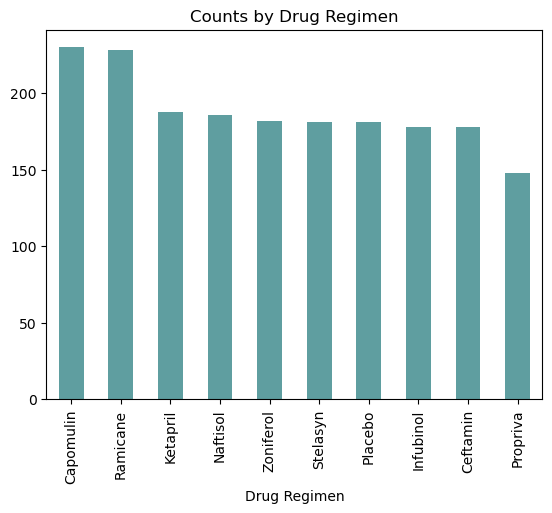

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
df_clean["Drug Regimen"].value_counts().sort_values(ascending = False).plot(kind="bar",title="Counts by Drug Regimen", color = "cadetblue")
plt.show()

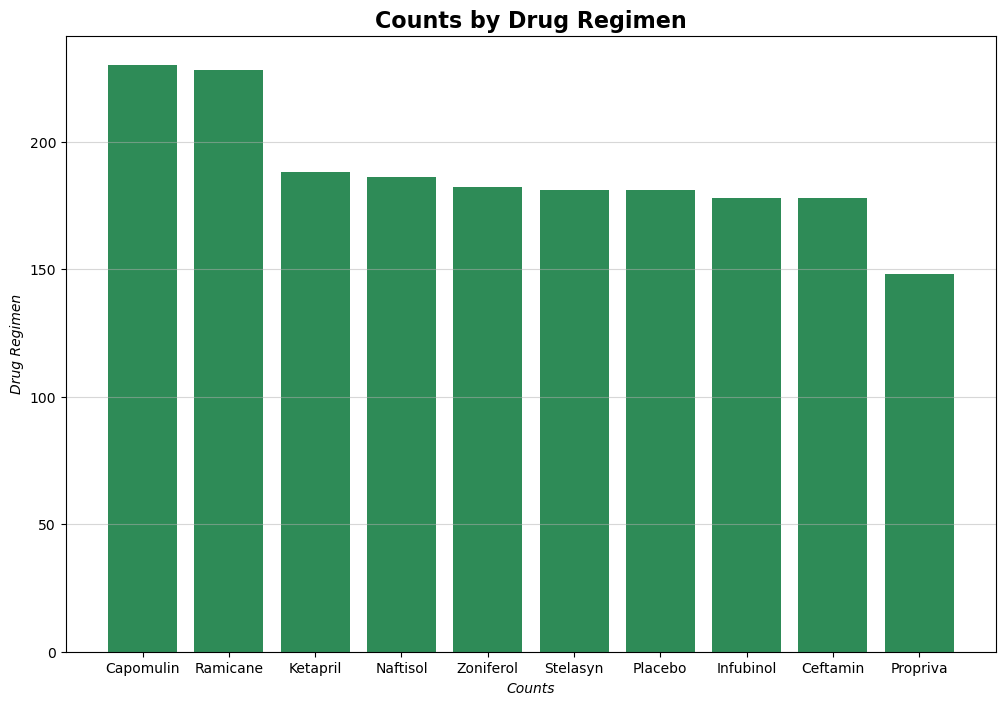

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.figure(figsize =(12,8))

dataset = df_clean["Drug Regimen"].value_counts()
x = list(dataset.index)
y = list(dataset.values)

plt.bar(x,y, color = "seagreen")

plt.ylabel("Drug Regimen", fontstyle = "italic")
plt.xlabel("Counts", fontstyle = "italic")
plt.title("Counts by Drug Regimen", fontweight = "bold", fontsize = 16)

plt.grid(axis='y', alpha = .5)

plt.show()


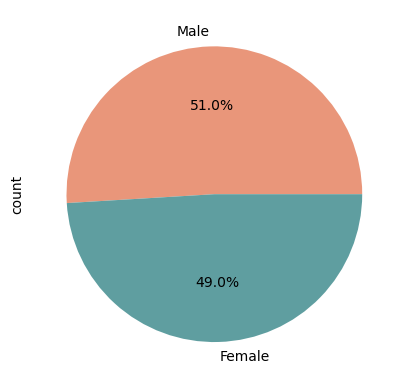

In [13]:

# Generate a pie plot showing the distribution of female versus male mice using Pandas
counts = df_clean.Sex.value_counts()
counts.plot(kind="pie",autopct='%1.1f%%', colors = ["darksalmon","cadetblue"])
plt.show()

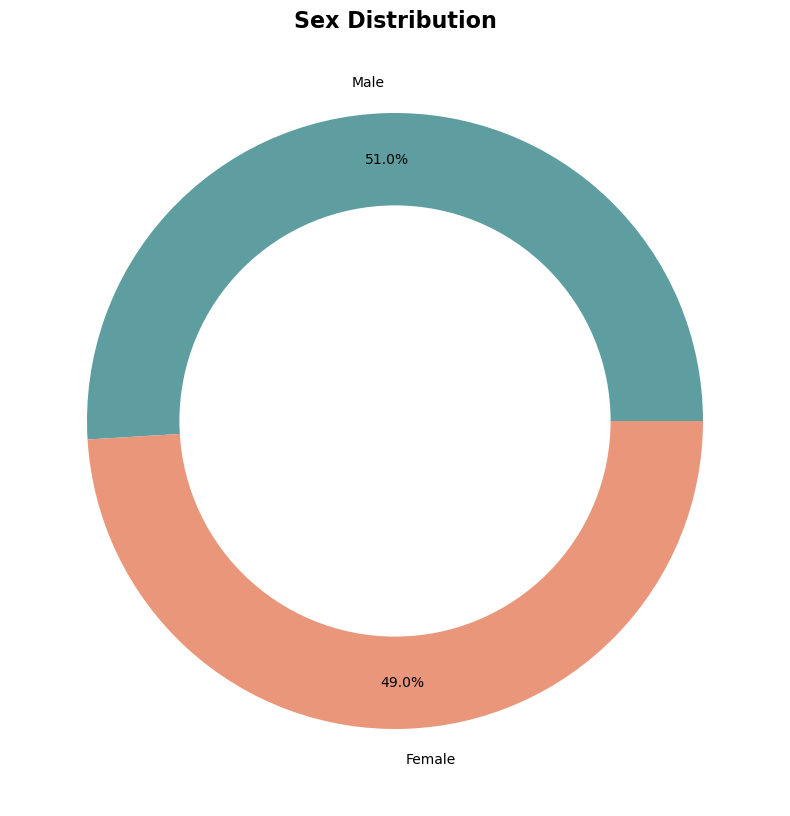

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.figure(figsize =(10,10))

dataset2 = df_clean["Sex"].value_counts()
pielabels = list(dataset2.index)
piedata= list(dataset2.values)

plt.pie(piedata, colors = ["cadetblue","darksalmon"],labels=pielabels,autopct="%1.1f%%", pctdistance=0.85)

center_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
 
fig.gca().add_artist(center_circle)


plt.title("Sex Distribution", fontweight = "bold", fontsize = 16)


plt.show()

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
df_max = df_clean.groupby(["Mouse ID"])['Timepoint'].max()
df_max = df_max.reset_index()

merged_data = df_max.merge(df_clean,on=['Mouse ID','Timepoint'],how="left")
merged_data.head()



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [16]:
# Put treatments into a list for for loop (and later for plot labels)
criteria = ["Capomulin","Ramicane","Infubinol","Ceftamin"]
# Create empty list to fill with tumor vol data (for plotting)
criteria_volume_list = []

#print(tumor_volumes)

        
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in criteria:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = merged_data.loc[merged_data["Drug Regimen"] == drug, 'Tumor Volume (mm3)']
    
    # add subset 
    criteria_volume_list.append(final_tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")



Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


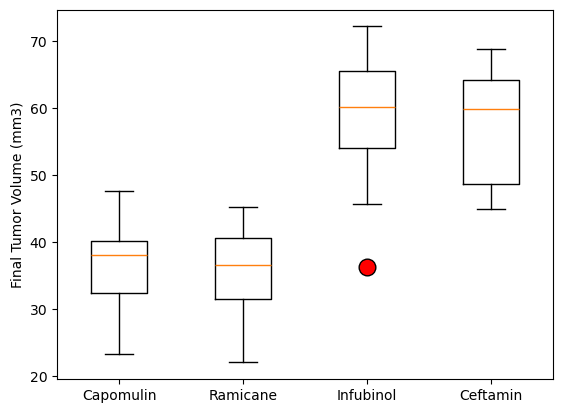

In [17]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
orange_out = dict(markerfacecolor='red',markersize=12)
plt.boxplot(criteria_volume_list, labels = criteria,flierprops=orange_out)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

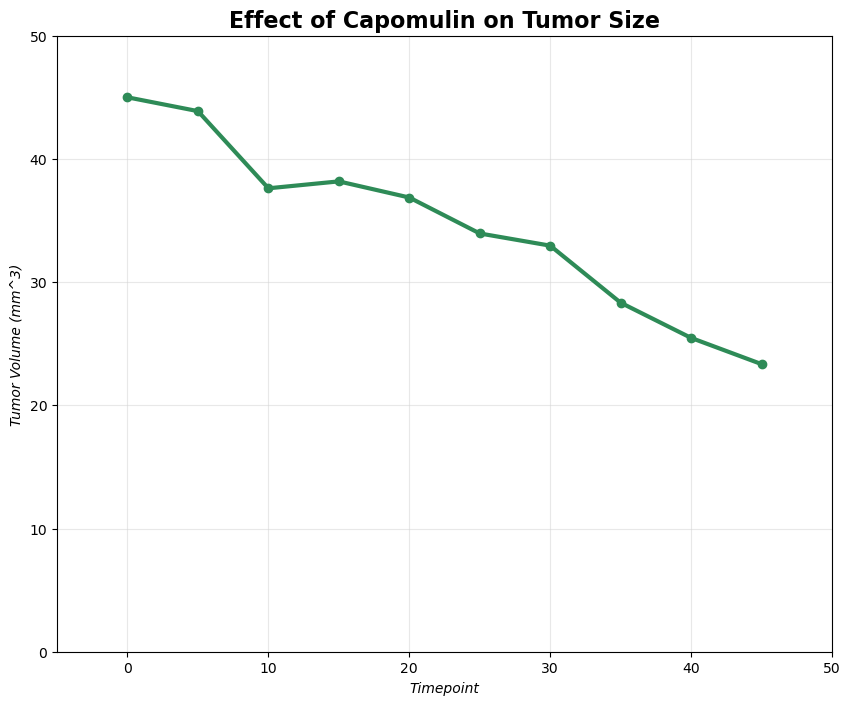

In [18]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mask_line = df_clean["Mouse ID"] == "s185"
df_line = df_clean.loc[mask_line]

time = list(df_line["Timepoint"])
y = list(df_line["Tumor Volume (mm3)"])

plt.figure(figsize = (10,8))

plt.plot(time, y, color = "seagreen", linewidth = 3, marker = 'o')

plt.xlim(-5, 50)
plt.ylim(0,50)

plt.title("Effect of Capomulin on Tumor Size", fontsize = 16, fontweight = "bold")
plt.xlabel("Timepoint", fontstyle = "italic")
plt.ylabel("Tumor Volume (mm^3)", fontstyle = "italic")

plt.grid(color = "lightgrey", alpha = .5)

plt.show()


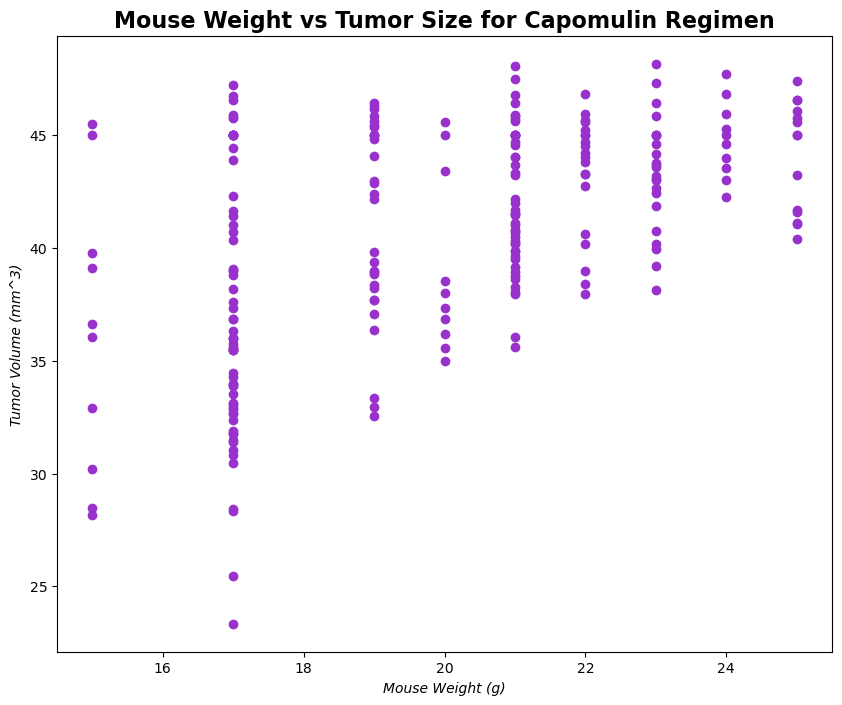

In [19]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
mask_capo = df_clean["Drug Regimen"] == "Capomulin"
df_capo = df_clean.loc[mask_capo]

x1 = list(df_capo["Weight (g)"])
y1 = list(df_capo["Tumor Volume (mm3)"])

plt.figure(figsize = (10,8))

plt.scatter(x1,y1,color = "darkorchid")

plt.xlabel("Mouse Weight (g)", fontstyle = "italic")
plt.ylabel("Tumor Volume (mm^3)", fontstyle = "italic")
plt.title("Mouse Weight vs Tumor Size for Capomulin Regimen", fontweight = "bold", fontsize = 16)

plt.show()

## Correlation and Regression

In [20]:
# Calculate the correlation coefficient and a linear regression model 
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x1,y1)

print(f"The correlation coefficient is: {round(rvalue,3)}")
print(f"The equation of the best fit line is: y = {round(slope, 2)}*x + {round(intercept,2)}")

# for mouse weight and average observed tumor volume for the entire Capomulin regimen


The correlation coefficient is: 0.526
The equation of the best fit line is: y = 0.96*x + 21.49
